<a href="https://colab.research.google.com/github/KillerGlass/deep-learning-in-pytroch/blob/main/classifica%C3%A7%C3%A3o_multiclasse_no_conjunto_de_dados_glass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#importanção das bibliotecas

In [240]:
import torch
from torch import optim, nn
import torch.nn.functional as F
from torchvision import datasets
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

import pandas as pd
import numpy as np
import seaborn as sns

#Base de dados


In [241]:
np.random.seed(123)
torch.manual_seed(123)

In [242]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Deep Learnig/Bases/glass.data")

In [243]:
data.head()

,Id number,Refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [244]:
data.shape

(214, 11)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


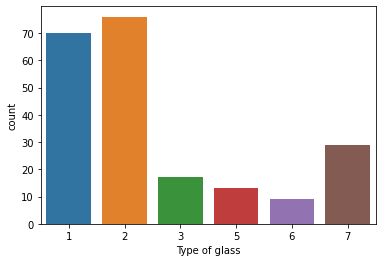

In [245]:
sns.countplot(data['Type of glass'])

In [246]:
prev = data.iloc[:, 1: 10].values
target = data.iloc[:,10].values
target -= 1
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6])

In [247]:
prev

array([[ 1.52101, 13.64   ,  4.49   , ...,  8.75   ,  0.     ,  0.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  7.83   ,  0.     ,  0.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  7.78   ,  0.     ,  0.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  8.44   ,  1.64   ,  0.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  8.48   ,  1.57   ,  0.     ],
       [ 1.51711, 14.23   ,  0.     , ...,  8.62   ,  1.67   ,  0.     ]])

In [248]:
x_train, x_test, y_train, y_test = train_test_split(prev,target, test_size=0.25)

In [249]:
len(x_train)

160

In [250]:
x_train = torch.tensor(x_train, dtype = torch.float)
y_train = torch.tensor(y_train, dtype = torch.long) 

# Construção do modelo

In [251]:
#10 -> 9 -> 9 -> 7 
# (10 + 7) / 2 = 8,5


classificador = nn.Sequential(
    nn.Linear(9,9),
    nn.ReLU(),
    nn.Linear(9,8),
    nn.ReLU(),
    nn.Linear(8,8),
    nn.ReLU(),
    nn.Linear(8,7)
)

In [252]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(classificador.parameters(), lr = 0.001, weight_decay= 0.0001)

In [253]:
dataset = torch.utils.data.TensorDataset(x_train,y_train)
train_loader = torch.utils.data.DataLoader(dataset,batch_size=1, shuffle=True)

# Treinamento


In [254]:
#mat1 and mat2 shapes cannot be multiplied (20x9 and 10x9)
#Erro corrigido, razão numero de atributos para camada de entrada estava menor do que os neuronios de entrada

#loss alto = aumentar epocas
for epoch in range(4000):
  running_loss = 0
  running_ac = 0
  for i, data in enumerate(train_loader):

    #inputs sao entradas, previsores. Labels as respostas reais
    inputs, labels = data
    #zerando os gradientes. Gradientes é a direção para onde vai ser feito os ajustes do peso
    optimizer.zero_grad()

    outputs = classificador(inputs)#classificador.forward é a mesma coisa, camada de aprendizado

    loss = criterion(outputs,labels)#calculando o erro

    #forward camada para frente q faz os caluculos, o backpropagation voltar para tras atualizando os pesos
    #backward atualiza os pesos
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

    res_p, res_class = F.softmax(outputs).topk(k=1, dim = 1)
    #verificando se o classificador acertou ou errou, depois de fazer uma comparaçao entre os vetores de boleanos
    #se faz a media
    accuracy = torch.mean((res_class == labels.view(*res_class.shape)).type(torch.float))
    running_ac += accuracy
  
  #a divisao ocorre para ter uma proporção de erro
  print("Epocas: {} | Loss: {:.5f}, Precisao {:03.2f}".format(epoch+1,running_loss/len(train_loader), running_ac/len(train_loader)))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epocas: 1 | Loss: 1.87955, Precisao 0.21
Epocas: 2 | Loss: 1.65662, Precisao 0.34
Epocas: 3 | Loss: 1.52209, Precisao 0.27
Epocas: 4 | Loss: 1.49667, Precisao 0.35
Epocas: 5 | Loss: 1.48514, Precisao 0.34
Epocas: 6 | Loss: 1.46592, Precisao 0.33
Epocas: 7 | Loss: 1.45190, Precisao 0.40
Epocas: 8 | Loss: 1.43217, Precisao 0.36
Epocas: 9 | Loss: 1.41413, Precisao 0.36
Epocas: 10 | Loss: 1.38152, Precisao 0.36
Epocas: 11 | Loss: 1.35756, Precisao 0.41
Epocas: 12 | Loss: 1.32112, Precisao 0.43
Epocas: 13 | Loss: 1.29644, Precisao 0.43
Epocas: 14 | Loss: 1.29231, Precisao 0.39
Epocas: 15 | Loss: 1.27506, Precisao 0.40
Epocas: 16 | Loss: 1.25836, Precisao 0.42
Epocas: 17 | Loss: 1.24217, Precisao 0.44
Epocas: 18 | Loss: 1.22714, Precisao 0.41
Epocas: 19 | Loss: 1.21052, Precisao 0.43
Epocas: 20 | Loss: 1.20078, Precisao 0.44
Epocas: 21 | Loss: 1.20165, Precisao 0.41
Epocas: 22 | Loss: 1.18075, Precisao 0.40
Epocas: 23 | Loss: 1.18362, Precisao 0.44
Epocas: 24 | Loss: 1.18069, Precisao 0.46
E

In [262]:
x_test = torch.tensor(x_test, dtype = torch.float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


In [264]:
result = classificador(x_test)

In [265]:
F.softmax(result)#passar para probabilidade

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """Entry point for launching an IPython kernel.


tensor([[4.1287e-09, 1.0000e+00, 1.2571e-27, 4.6256e-20, 2.9411e-09, 1.3045e-29,
         0.0000e+00],
        [0.0000e+00, 1.8448e-15, 1.0502e-17, 1.9262e-14, 6.6302e-15, 1.2917e-12,
         1.0000e+00],
        [9.9427e-01, 5.6792e-03, 4.4771e-05, 3.0379e-08, 3.7817e-12, 1.0205e-09,
         7.6226e-06],
        [2.6002e-12, 2.4149e-01, 7.1631e-17, 1.0812e-08, 7.5851e-01, 4.6769e-11,
         1.0470e-17],
        [5.3780e-02, 9.3345e-01, 1.2649e-02, 5.1791e-05, 7.2261e-06, 5.4613e-05,
         3.5648e-06],
        [9.4569e-01, 5.4250e-02, 5.0222e-05, 1.5115e-07, 1.9239e-11, 1.1066e-08,
         1.3367e-05],
        [0.0000e+00, 2.4079e-24, 3.8301e-30, 1.2158e-24, 4.1096e-21, 4.9209e-25,
         1.0000e+00],
        [1.0311e-01, 8.9618e-01, 7.0586e-04, 2.8813e-06, 6.8636e-07, 1.1940e-06,
         2.5218e-08],
        [2.4366e-29, 3.0456e-08, 2.3478e-10, 1.9901e-09, 7.4913e-09, 2.9455e-09,
         1.0000e+00],
        [9.0119e-04, 9.9909e-01, 1.0959e-05, 5.8868e-08, 1.0878e-06, 7.38

In [266]:
result = [np.argmax(t) for t in result.detach().numpy()]

In [267]:
matriz = confusion_matrix(result,y_test)

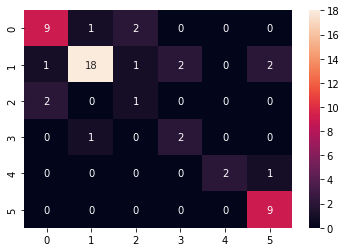

In [268]:
sns.heatmap(matriz, annot = True)

In [270]:
result = classificador(x_test)
y_test = torch.tensor(y_test, dtype = torch.float)
res_p, res_class = F.softmax(result).topk(k=1, dim = 1)
#verificando se o classificador acertou ou errou, depois de fazer uma comparaçao entre os vetores de boleanos
#se faz a media
accuracy = torch.mean((res_class == y_test.view(*res_class.shape)).type(torch.float))
accuracy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  This is separate from the ipykernel package so we can avoid doing imports until


tensor(0.7593)